# Implementation of Naive Bayes Algorithm

Build a Sentiment Analysis Model for IMDB Movie Review Dataset

Dataset : IMDB Movie Review is available in shared drive.

# New Section
You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
using the IMDB Movie Review Dataset.

# Part 1:

1. Load the dataset and preprocess the reviews.

a. Convert all text to lowercase.

b. Remove non-alphabetic characters (punctuation).

c. Tokenize the reviews and remove common stopwords.

d. Apply stemming to reduce words to their root form.

In [27]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/IMDB Dataset.csv")
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    tokens = text.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)

df['label'] = df['sentiment'].map({'positive':1, 'negative':0})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Split the dataset into training and testing sets (80% training, 20% testing).

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['label'], test_size=0.2, random_state=42)

3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

a. Implement a Bag-of-Words model using CountVectorizer.

b. Train the Naive Bayes classifier using the training set.

In [30]:
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

Part 2:
1. Evaluate the performance of the model using the following metrics:

a. Accuracy

b. Precision, Recall, and F1-score

c. Confusion Matrix

d. ROC-AUC Score

Accuracy: 0.8494
Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1 Score: 0.8496405750798722
ROC-AUC: 0.8494391998809208

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



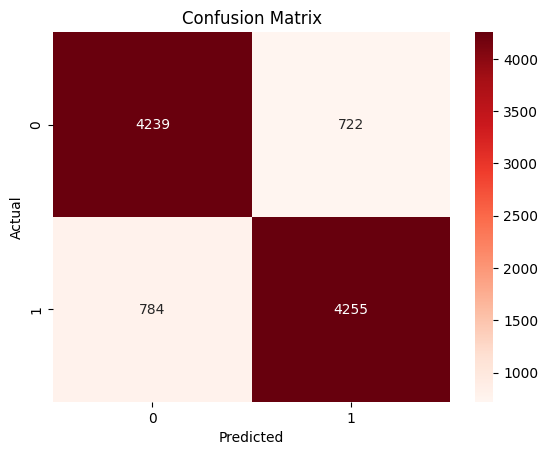

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3 Feature Selection Exercise.

3.1 Feature Selection using Wrapper Methods.

Dataset: Breast Cancer Prognostic Dataset

Objective

You are tasked with identifying the most important features in predicting breast cancer prognosis using the
Breast Cancer Prognostic Dataset from the UCI Machine Learning Repository. Apply a wrapper method
(Recursive Feature Elimination) to select the best features and evaluate your model’s performance.

Part 1: Data Loading and Preprocessing
1. Load the Breast Cancer Prognostic Dataset.
2. Dataset is available in Drive.
3. Perform basic exploratory data analysis (EDA) to understand the dataset:
• Summarize key statistics for each feature.
• Check for missing values and handle them appropriately.
4. Split the dataset into training (80%) and testing (20%) sets.

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/Breast Cancer Wisconsin.csv")

print(data.info())
print(data.describe())
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=['float64','int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

print(data.columns)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].astype('category').cat.codes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Part 2: Apply a Wrapper Method
1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:
• Select the top 5 features that contribute the most to predicting the target variable.
• Visualize the ranking of features.
2. Train the Logistic Regression model using only the selected features.

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

feature_names = X.columns

if X_train_imp.shape[1] != len(feature_names):
    print("Column mismatch detected!")
    print("X_train shape:", X_train_imp.shape)
    print("Feature names count:", len(feature_names))
else:
    X_train = pd.DataFrame(X_train_imp, columns=feature_names)
    X_test = pd.DataFrame(X_test_imp, columns=feature_names)

    logreg = LogisticRegression(max_iter=1000)
    rfe = RFE(logreg, n_features_to_select=5)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]
    print("Top 5 Selected Features:", selected_features)

    ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
    ranking.sort_values('Rank', inplace=True)

    plt.barh(ranking['Feature'], ranking['Rank'])
    plt.xlabel("RFE Rank (1=Best)")
    plt.title("Feature Ranking")
    plt.show()

Column mismatch detected!
X_train shape: (455, 31)
Feature names count: 32


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Part 3: Model Evaluation
1. Evaluate the model’s performance using the testing set:
• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. Compare the performance of the model trained on all features versus the model trained on the selected
features.

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/us

Top 5 Selected Features: Index(['radius_mean', 'texture_se', 'radius_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')


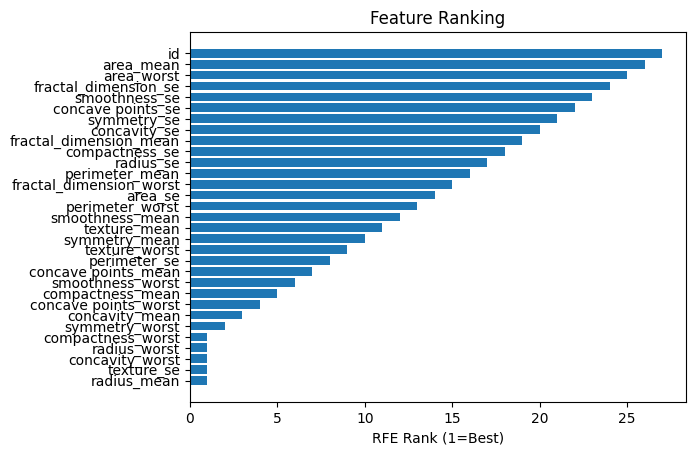

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

feature_names = X.columns[:X_train_imp.shape[1]]

X_train = pd.DataFrame(X_train_imp, columns=feature_names)
X_test = pd.DataFrame(X_test_imp, columns=feature_names)

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Top 5 Selected Features:", selected_features)

ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
ranking.sort_values('Rank', inplace=True)

plt.barh(ranking['Feature'], ranking['Rank'])
plt.xlabel("RFE Rank (1=Best)")
plt.title("Feature Ranking")
plt.show()

Part 4: Experiment
1. Experiment with different numbers of selected features (e.g., top 3, top 7).
2. Discuss how feature selection affects model performance.

In [35]:
for n in [3, 7]:
    rfe = RFE(logreg, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    selected = X_train.columns[rfe.support_]
    print(f"\nTop {n} Features:", selected.tolist())

    logreg.fit(X_train[selected], y_train)
    y_pred_n = logreg.predict(X_test[selected])
    print(f"Performance with Top {n} Features:")
    print("Accuracy:", accuracy_score(y_test, y_pred_n))
    print("F1 Score:", f1_score(y_test, y_pred_n))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 3 Features: ['texture_se', 'compactness_worst', 'concavity_worst']
Performance with Top 3 Features:
Accuracy: 0.8070175438596491
F1 Score: 0.6857142857142857


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 7 Features: ['radius_mean', 'concavity_mean', 'texture_se', 'radius_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst']
Performance with Top 7 Features:
Accuracy: 0.9736842105263158
F1 Score: 0.9647058823529412
